In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
import warnings
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.model_selection import GridSearchCV
warnings.filterwarnings("ignore")

# Data Ingestion

In [2]:
df=pd.read_csv("predictive_maintenance.csv")
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


# Data Preparation

In [3]:
pm = df.copy()
pm.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,No Failure


**Duplicate Treatment**

In [4]:
pm.duplicated().value_counts()

False    10000
dtype: int64

**Missing Value Treatment**

In [5]:
pm.isna().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Failure Type               0
dtype: int64

**Unique Treatment**

In [6]:
pm.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Failure Type                   6
dtype: int64

In [7]:
#Columns UDI and Product ID are not useful to the prediction of failure type
pm = pm.drop(columns = ['UDI', 'Product ID'])
pm.head()

,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Failure Type
0,M,298.1,308.6,1551,42.8,0,No Failure
1,L,298.2,308.7,1408,46.3,3,No Failure
2,L,298.1,308.5,1498,49.4,5,No Failure
3,L,298.2,308.6,1433,39.5,7,No Failure
4,L,298.2,308.7,1408,40.0,9,No Failure


In [8]:
pm.describe()

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,300.004930,310.005560,1538.776100,39.986910,107.951000
std,2.000259,1.483734,179.284096,9.968934,63.654147
min,295.300000,305.700000,1168.000000,3.800000,0.000000
25%,298.300000,308.800000,1423.000000,33.200000,53.000000
50%,300.100000,310.100000,1503.000000,40.100000,108.000000
75%,301.500000,311.100000,1612.000000,46.800000,162.000000
max,304.500000,313.800000,2886.000000,76.600000,253.000000


In [9]:
pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Type                     10000 non-null  object 
 1   Air temperature [K]      10000 non-null  float64
 2   Process temperature [K]  10000 non-null  float64
 3   Rotational speed [rpm]   10000 non-null  int64  
 4   Torque [Nm]              10000 non-null  float64
 5   Tool wear [min]          10000 non-null  int64  
 6   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 547.0+ KB


**Outlier Treatment**

In [10]:
# renaming columns
pm.rename(columns={'Air temperature [K]': 'air_temp', 'Process temperature [K]': 'process_temp', 'Rotational speed [rpm]': 'RPM', 
                   'Torque [Nm]': 'Torque', 'Tool wear [min]': 'tool_wear', 'Failure Type': 'failure_type',},  inplace=True)


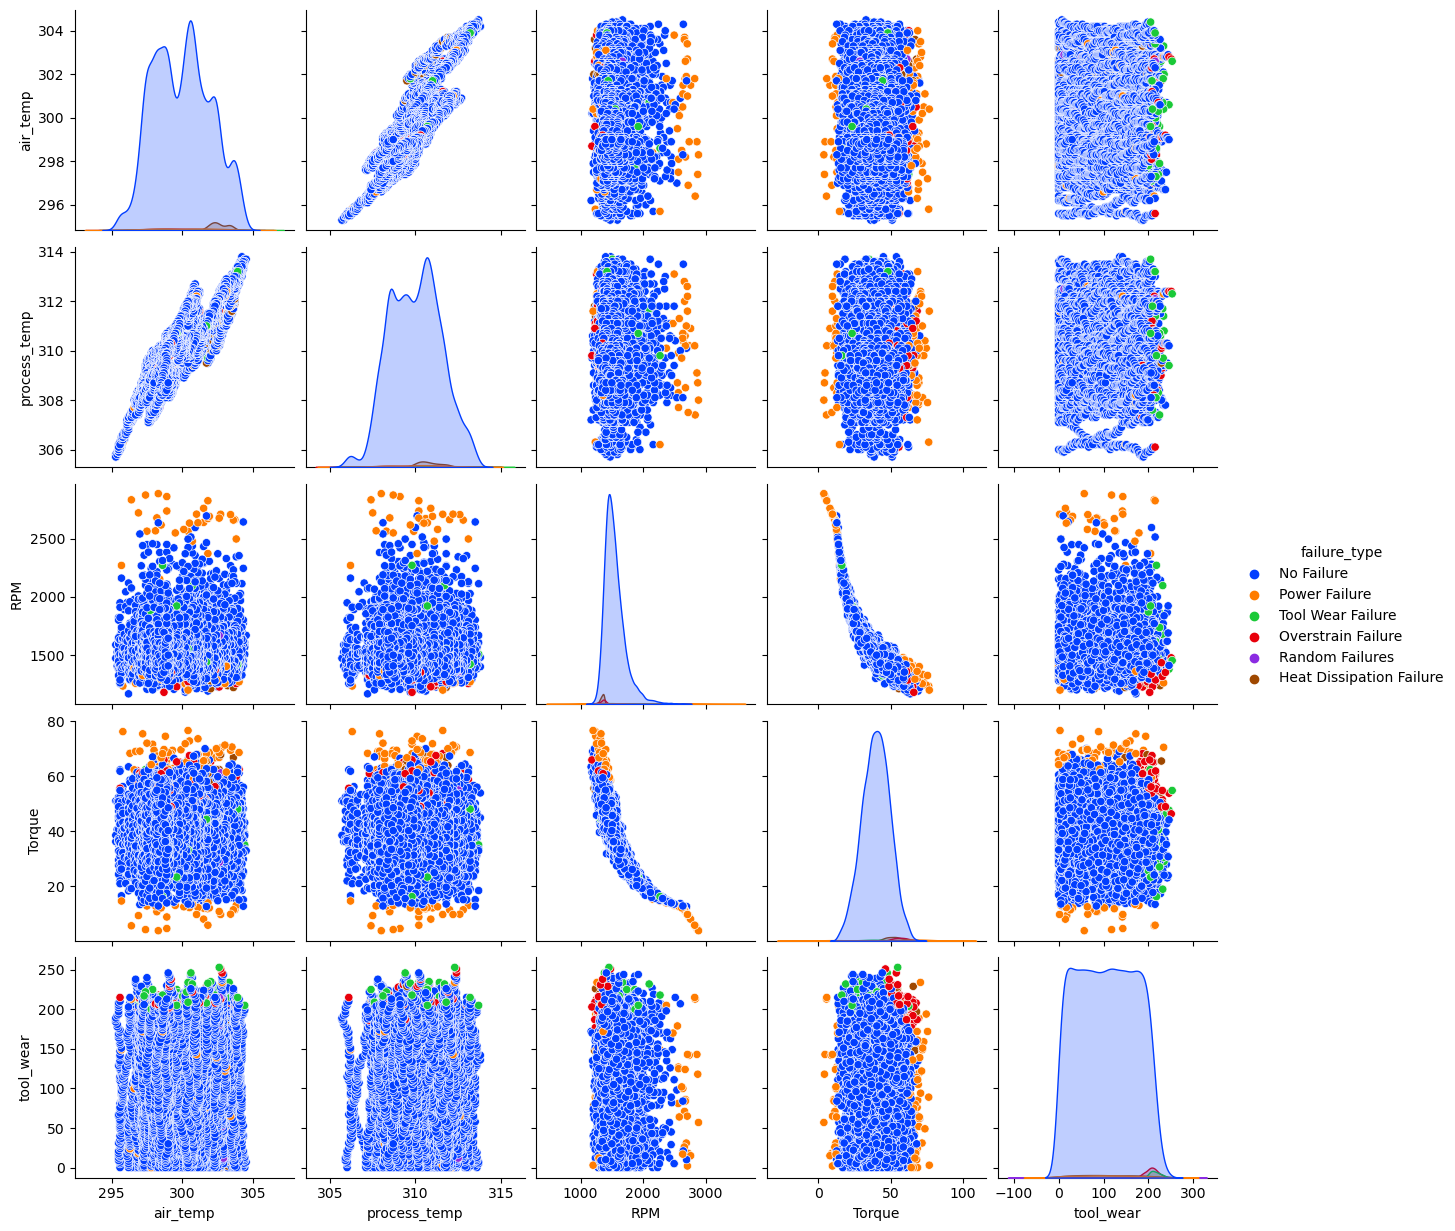

In [11]:
# Create a matrix scatterplot 
sns.pairplot(pm, vars=['air_temp', 'process_temp', 'RPM',
          'Torque', 'tool_wear'], hue = 'failure_type', palette = "bright") 

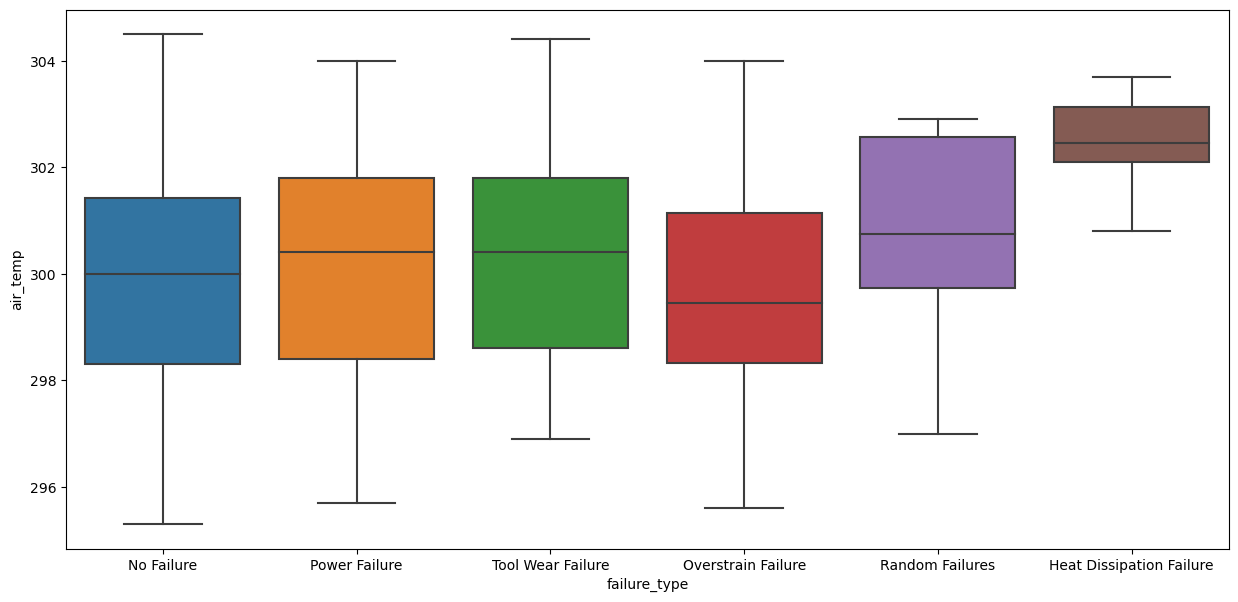

In [12]:
#creating boxplot to get more details on outliers
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =pm['failure_type'], y =pm['air_temp'])

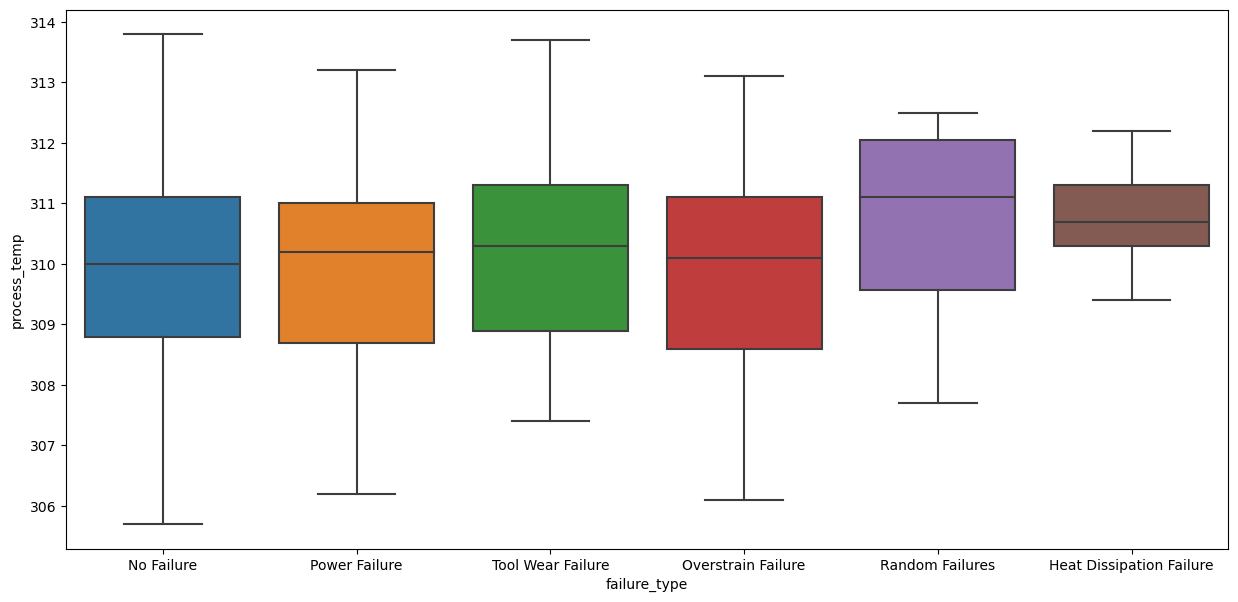

In [13]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =pm['failure_type'], y =pm['process_temp'])

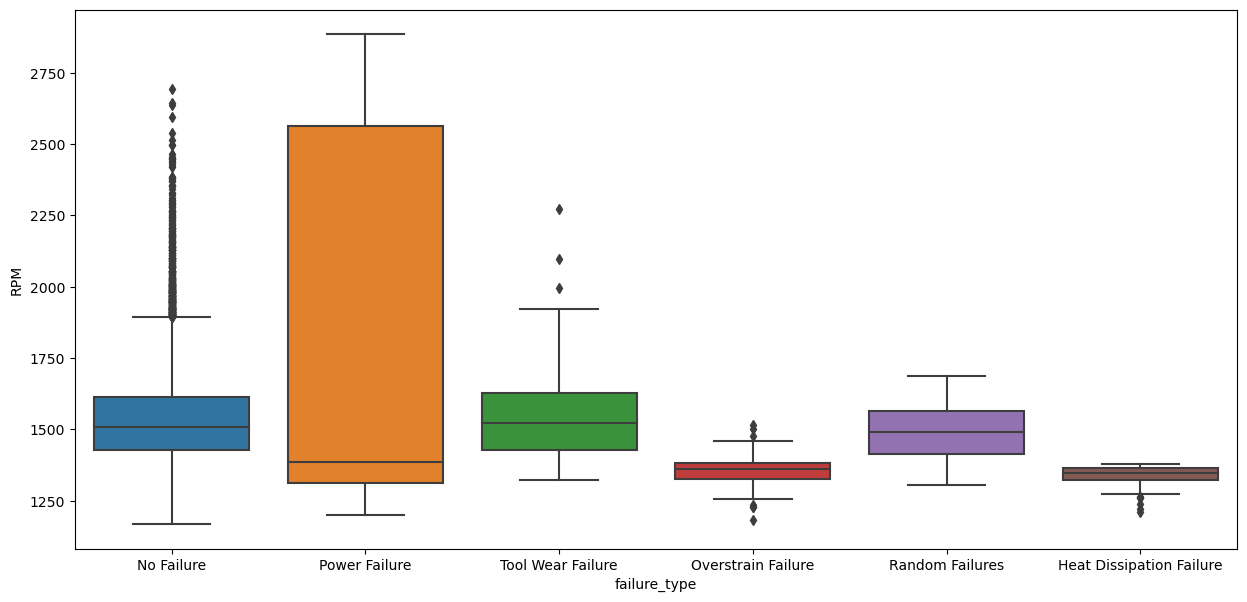

In [14]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =pm['failure_type'], y =pm['RPM'])

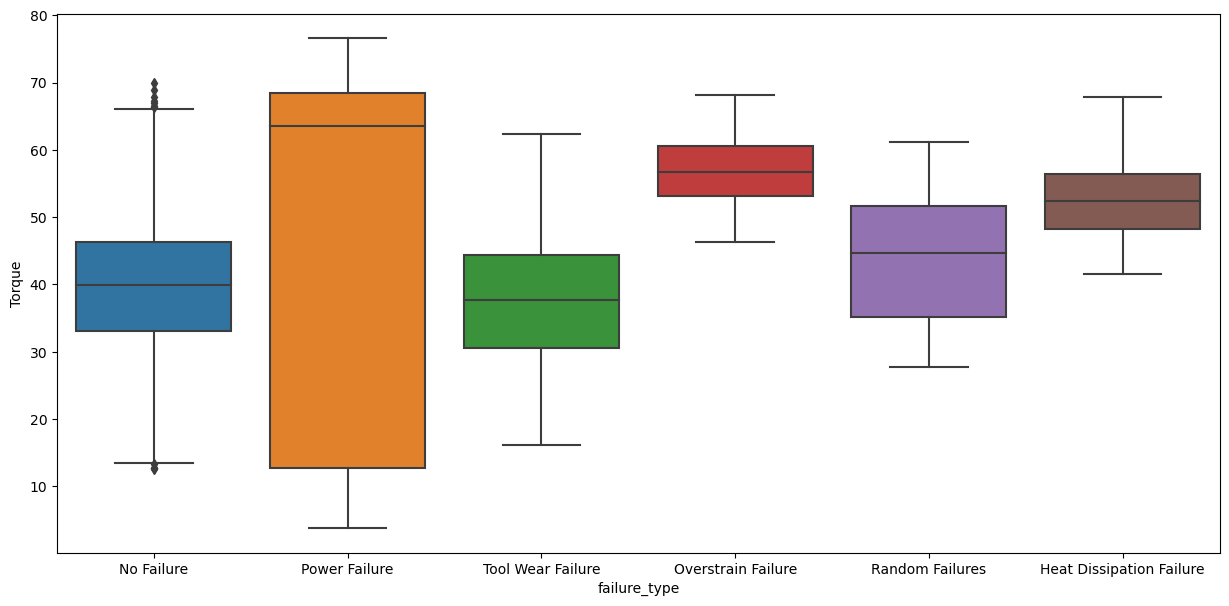

In [15]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =pm['failure_type'], y =pm['Torque'])

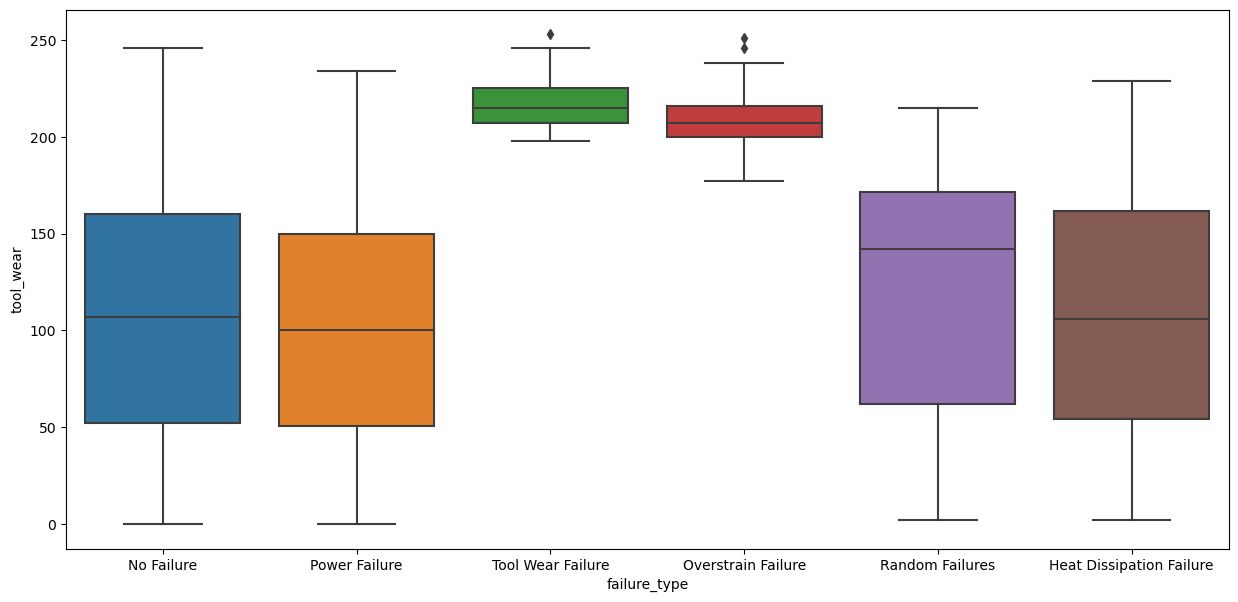

In [16]:
f, ax = plt.subplots(figsize=(15,7))
ax = sns.boxplot(x =pm['failure_type'], y =pm['tool_wear'])

In [17]:
#fixing outliers in tool wear
pm = pm[pm['tool_wear'] <250]

# Exploratory Data Analysis

* There are five numerical parameters present in this dataset (Air temp, Process temp, Tool wear, Torque, RPM.
* Air temperature is the temperature of the machine surrounding air.
* Process temperature is the temperature generated during drilling.
* Tool wear is the amount of time the tool has already been used in minutes.
* Torque is a measure of the force that can cause an object to rotate about an axis.
* RPM is the speed at which a drill bit breaks the rock under it to deepen the borehole.

**Research Question**
* What features are directly correlated to one another?

In [18]:
df_explore = pm.copy()

In [19]:
df_explore.groupby(['failure_type'])['air_temp'].mean()

failure_type
Heat Dissipation Failure    302.567857
No Failure                  299.972855
Overstrain Failure          299.831169
Power Failure               300.075789
Random Failures             300.766667
Tool Wear Failure           300.236364
Name: air_temp, dtype: float64

In [20]:
df_explore.groupby(['failure_type'])['process_temp'].mean()

failure_type
Heat Dissipation Failure    310.799107
No Failure                  309.994343
Overstrain Failure          310.020779
Power Failure               309.954737
Random Failures             310.755556
Tool Wear Failure           310.115909
Name: process_temp, dtype: float64

In [21]:
df_explore.groupby(['failure_type'])['tool_wear'].mean()

failure_type
Heat Dissipation Failure    107.339286
No Failure                  106.678927
Overstrain Failure          207.662338
Power Failure               101.884211
Random Failures             119.888889
Tool Wear Failure           215.727273
Name: tool_wear, dtype: float64

In [22]:
df_explore.groupby(['failure_type'])['Torque'].mean()

failure_type
Heat Dissipation Failure    52.778571
No Failure                  39.624316
Overstrain Failure          57.015584
Power Failure               48.514737
Random Failures             43.522222
Tool Wear Failure           36.827273
Name: Torque, dtype: float64

In [23]:
df_explore.groupby(['failure_type'])['RPM'].mean()

failure_type
Heat Dissipation Failure    1337.964286
No Failure                  1540.324389
Overstrain Failure          1352.649351
Power Failure               1763.968421
Random Failures             1489.444444
Tool Wear Failure           1573.318182
Name: RPM, dtype: float64

In [24]:
df_explore.groupby(['failure_type', 'Type'])['air_temp'].mean()

failure_type              Type
Heat Dissipation Failure  H       302.700000
                          L       302.582432
                          M       302.496667
No Failure                H       299.834423
                          L       299.982717
                          M       299.999863
Overstrain Failure        H       302.800000
                          L       299.747222
                          M       300.600000
Power Failure             H       300.440000
                          L       299.949153
                          M       300.258065
Random Failures           H       300.825000
                          L       301.116667
                          M       298.550000
Tool Wear Failure         H       299.800000
                          L       300.340000
                          M       300.238462
Name: air_temp, dtype: float64

In [25]:
df_explore.groupby(['failure_type', 'Type'])['process_temp'].mean()

failure_type              Type
Heat Dissipation Failure  H       310.950000
                          L       310.813514
                          M       310.723333
No Failure                H       309.914402
                          L       310.000017
                          M       310.009979
Overstrain Failure        H       312.400000
                          L       309.963889
                          M       310.450000
Power Failure             H       310.160000
                          L       309.918644
                          M       309.990323
Random Failures           H       310.650000
                          L       311.125000
                          M       308.750000
Tool Wear Failure         H       309.316667
                          L       310.200000
                          M       310.323077
Name: process_temp, dtype: float64

In [26]:
df_explore.groupby(['failure_type', 'Type'])['tool_wear'].mean()

failure_type              Type
Heat Dissipation Failure  H        87.750000
                          L       106.932432
                          M       113.566667
No Failure                H       106.781410
                          L       106.682300
                          M       106.637860
Overstrain Failure        H       246.000000
                          L       207.513889
                          M       200.750000
Power Failure             H       141.800000
                          L       100.355932
                          M        98.354839
Random Failures           H        55.250000
                          L       142.500000
                          M       113.500000
Tool Wear Failure         H       220.833333
                          L       214.680000
                          M       215.384615
Name: tool_wear, dtype: float64

In [27]:
df_explore.groupby(['failure_type', 'Type'])['Torque'].mean()

failure_type              Type
Heat Dissipation Failure  H       55.137500
                          L       52.982432
                          M       51.646667
No Failure                H       39.601124
                          L       39.544120
                          M       39.790432
Overstrain Failure        H       53.800000
                          L       56.740278
                          M       62.775000
Power Failure             H       56.360000
                          L       47.706780
                          M       48.787097
Random Failures           H       41.275000
                          L       45.350000
                          M       37.050000
Tool Wear Failure         H       41.083333
                          L       36.516000
                          M       35.461538
Name: Torque, dtype: float64

In [28]:
df_explore.groupby(['failure_type', 'Type'])['RPM'].mean()

failure_type              Type
Heat Dissipation Failure  H       1322.375000
                          L       1336.256757
                          M       1346.333333
No Failure                H       1540.232891
                          L       1541.947195
                          M       1537.151235
Overstrain Failure        H       1411.000000
                          L       1354.569444
                          M       1303.500000
Power Failure             H       1581.600000
                          L       1780.101695
                          M       1762.677419
Random Failures           H       1505.750000
                          L       1475.083333
                          M       1543.000000
Tool Wear Failure         H       1492.166667
                          L       1568.360000
                          M       1620.307692
Name: RPM, dtype: float64

<AxesSubplot:xlabel='Type', ylabel='process_temp'>

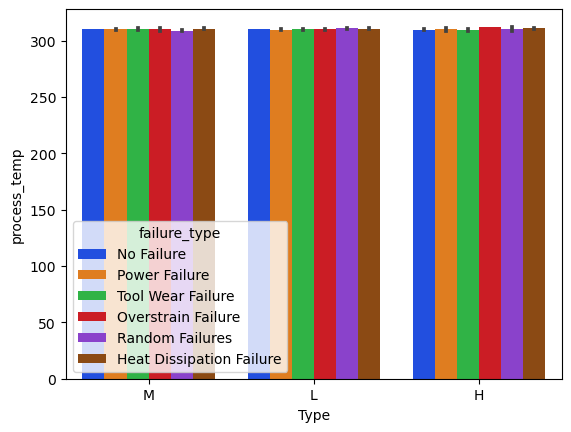

In [29]:
sns.barplot(data = df_explore, x = 'Type', y = 'process_temp', hue = 'failure_type', palette = 'bright')

<AxesSubplot:xlabel='Type', ylabel='air_temp'>

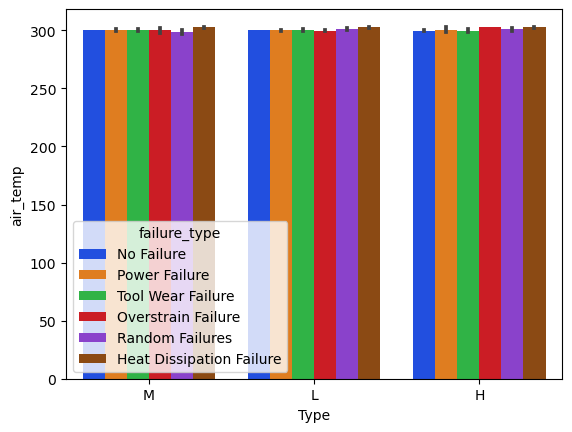

In [30]:
sns.barplot(data = df_explore, x = 'Type', y = 'air_temp', hue = 'failure_type', palette = 'bright')

<AxesSubplot:xlabel='Type', ylabel='tool_wear'>

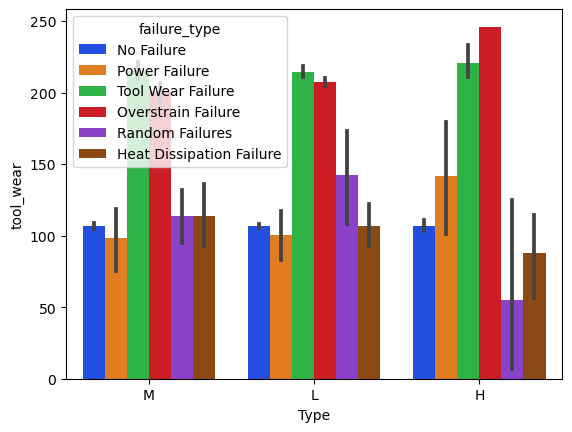

In [31]:
sns.barplot(data = df_explore, x = 'Type', y = 'tool_wear', hue = 'failure_type', palette = 'bright')

<AxesSubplot:xlabel='Type', ylabel='Torque'>

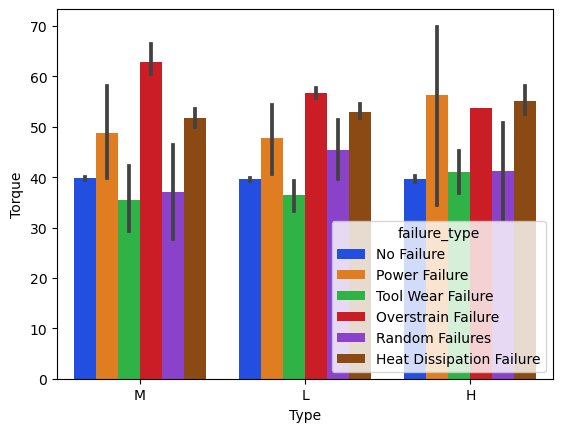

In [32]:
sns.barplot(data = df_explore, x = 'Type', y = 'Torque', hue = 'failure_type', palette = 'bright')

<AxesSubplot:xlabel='Type', ylabel='RPM'>

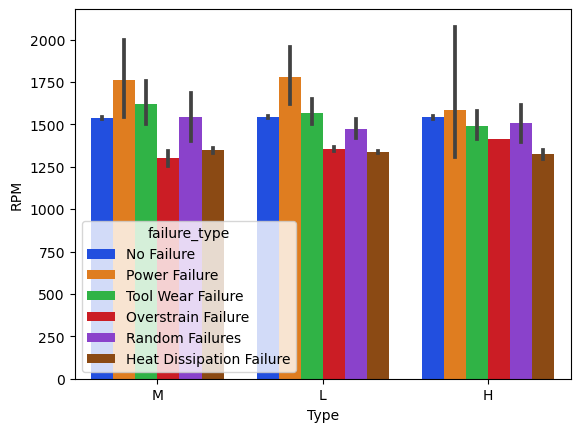

In [33]:
sns.barplot(data = df_explore, x = 'Type', y = 'RPM', hue = 'failure_type', palette = 'bright')

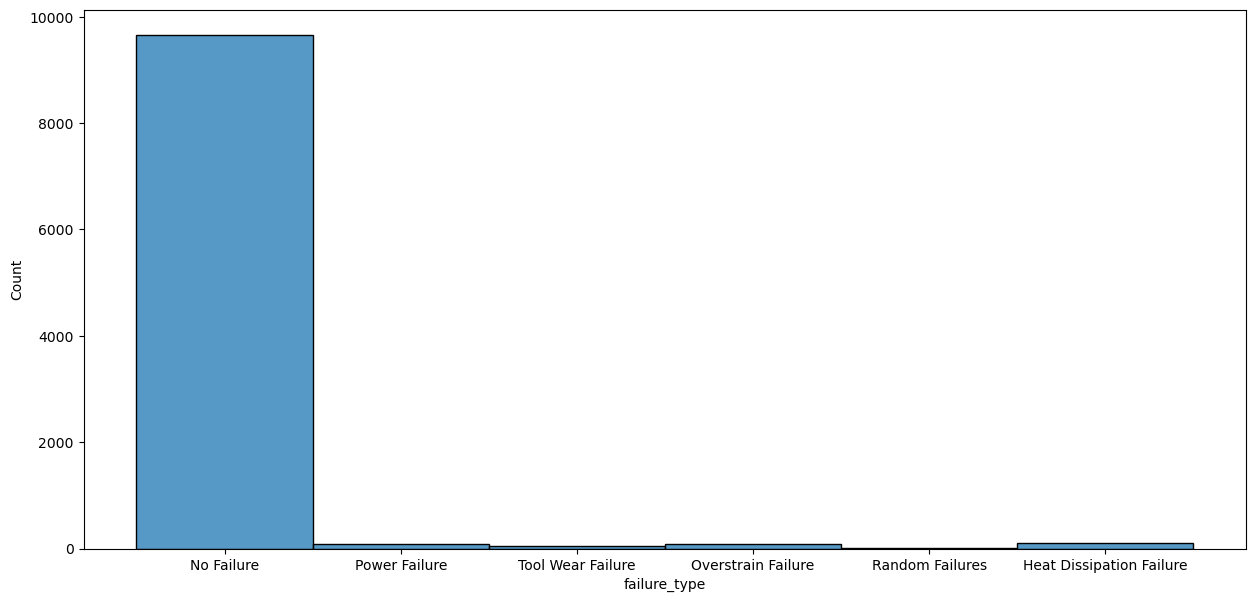

In [34]:
# checking for data imbalance
f, ax = plt.subplots(figsize=(15,7))
ax = sns.histplot(data = df_explore, x = 'failure_type', palette = 'bright')

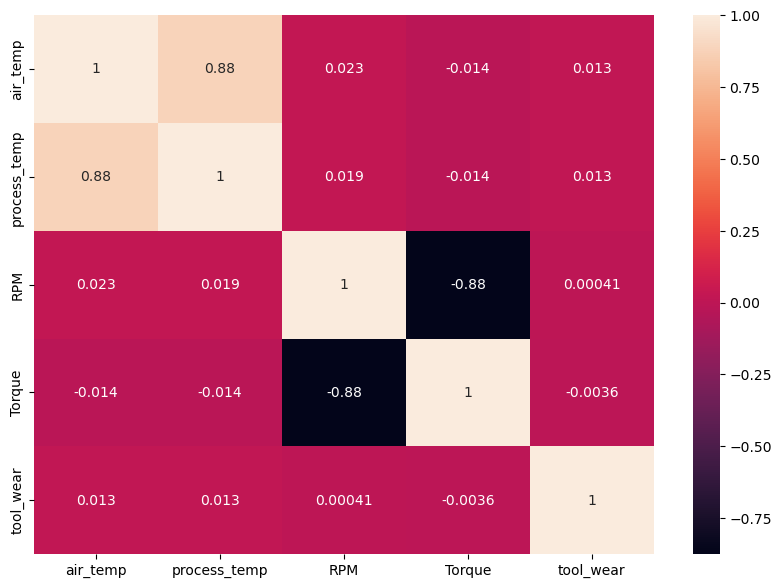

In [35]:
# checking for inputs correlation
corr_mx = df_explore.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot= True, annot_kws={'size':10})

**Multicollinearity occurs when independent variables in a regression model are correlated. This correlation is a problem because independent variables should be independent. If the degree of correlation between variables is high enough, it can cause problems when you fit the model and interpret the results.**

REFERENCE: https://statisticsbyjim.com/regression/multicollinearity-in-regression-analysis/#:~:text=Multicollinearity%20occurs%20when%20independent%20variables%20in%20a%20regression,you%20fit%20the%20model%20and%20interpret%20the%20results.

# Feature Engineering

In [36]:
df_feature = df_explore.copy()

In [37]:
df_feature.failure_type.unique()

array(['No Failure', 'Power Failure', 'Tool Wear Failure',
       'Overstrain Failure', 'Random Failures',
       'Heat Dissipation Failure'], dtype=object)

**Label encode Target Variable**

In [38]:
scaler = LabelEncoder()
df_feature['failure_type'] = scaler.fit_transform(df_feature['failure_type'])
df_feature.head()

,Type,air_temp,process_temp,RPM,Torque,tool_wear,failure_type
0,M,298.1,308.6,1551,42.8,0,1
1,L,298.2,308.7,1408,46.3,3,1
2,L,298.1,308.5,1498,49.4,5,1
3,L,298.2,308.6,1433,39.5,7,1
4,L,298.2,308.7,1408,40.0,9,1


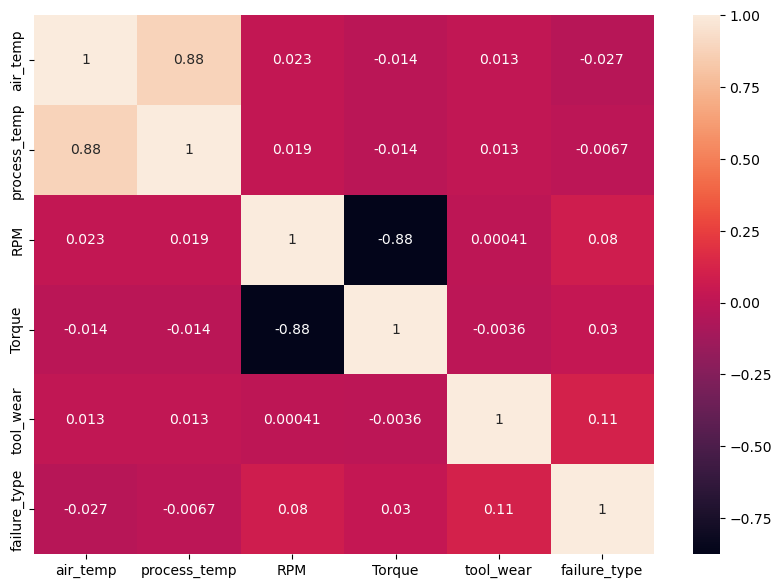

In [39]:
#checking for correlation of data with target to know the multicollinearity feature to drop
corr_mx = df_feature.corr()
f, ax = plt.subplots(figsize=(10,7))
ax = sns.heatmap(corr_mx, annot= True, annot_kws={'size':10})

In [40]:
#air temp and process temp have high correlation, resulting in multicollinearity of the dataset, 
#so one of them has to be dropped.
df_feature = df_feature.drop(columns = ['air_temp'])
df_feature.head()

,Type,process_temp,RPM,Torque,tool_wear,failure_type
0,M,308.6,1551,42.8,0,1
1,L,308.7,1408,46.3,3,1
2,L,308.5,1498,49.4,5,1
3,L,308.6,1433,39.5,7,1
4,L,308.7,1408,40.0,9,1


**One-Hot-Encode Type variable**

In [41]:
ohe = ce.OneHotEncoder(cols=['Type'], use_cat_names=True)
df_feature = ohe.fit_transform(df_feature)
df_feature.head()

,Type_M,Type_L,Type_H,process_temp,RPM,Torque,tool_wear,failure_type
0,1,0,0,308.6,1551,42.8,0,1
1,0,1,0,308.7,1408,46.3,3,1
2,0,1,0,308.5,1498,49.4,5,1
3,0,1,0,308.6,1433,39.5,7,1
4,0,1,0,308.7,1408,40.0,9,1


**Feature Scaling**

In [42]:
data_feat = df_feature[['process_temp', 'RPM','Torque', 'tool_wear']]

In [43]:
from sklearn.preprocessing import MinMaxScaler

#Scale data using StandardScaler
scaler = MinMaxScaler()
cols = data_feat.columns.tolist()
    
#Fit the whole set of data in the scaler and scale it, so min and max values are based on the entire features 
features_scaled = scaler.fit_transform(data_feat)
features_scaled = pd.DataFrame(features_scaled, columns=cols)
features_scaled.head()

,process_temp,RPM,Torque,tool_wear
0,0.358025,0.222934,0.535714,0.000000
1,0.370370,0.139697,0.583791,0.012195
2,0.345679,0.192084,0.626374,0.020325
3,0.358025,0.154249,0.490385,0.028455
4,0.370370,0.139697,0.497253,0.036585


In [44]:
df_feature = df_feature.drop(columns=['process_temp', 'RPM','Torque', 'tool_wear'])
df_final = pd.merge(df_feature,features_scaled, left_index=True, right_index=True)
df_final.head()

,Type_M,Type_L,Type_H,failure_type,process_temp,RPM,Torque,tool_wear
0,1,0,0,1,0.358025,0.222934,0.535714,0.000000
1,0,1,0,1,0.370370,0.139697,0.583791,0.012195
2,0,1,0,1,0.345679,0.192084,0.626374,0.020325
3,0,1,0,1,0.358025,0.154249,0.490385,0.028455
4,0,1,0,1,0.370370,0.139697,0.497253,0.036585


In [45]:
y = df_final[['failure_type']]
X = df_final.drop(columns=['failure_type'])

# Model Development

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

* When a dataset has more data points in a particular class than others, it is imbalanced.
* I would work on the imbalance using resampling method (SMOTE-TOMek)
* Resampling is done after the data is split into training, test and validation sets. Resampling is done only on the training set or the performance measures could get skewed. (REFERENCE: https://www.bing.com/ck/a?!&&p=df532e7145534bebJmltdHM9MTY3OTcwMjQwMCZpZ3VpZD0yOTA0MTMwMy0xZGRjLTZlZGQtMmJiNi0wMWJiMWNmOTZmZjEmaW5zaWQ9NTQwNQ&ptn=3&hsh=3&fclid=29041303-1ddc-6edd-2bb6-01bb1cf96ff1&psq=is+resampling+of+an+imbalanced+dataset+better+done+before+train+test+split%2c+or+after%3f&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL3doYXQtdG8tZG8td2hlbi15b3VyLWNsYXNzaWZpY2F0aW9uLWRhdGFzZXQtaXMtaW1iYWxhbmNlZC02YWYwMzFiMTJhMzYjOn46dGV4dD1BJTIwd2lkZWx5JTIwYWRvcHRlZCUyMHRlY2huaXF1ZSUyMGZvciUyMGRlYWxpbmclMjB3aXRoJTIwaGlnaGx5LHNldCUyMG9yJTIwdGhlJTIwcGVyZm9ybWFuY2UlMjBtZWFzdXJlcyUyMGNvdWxkJTIwZ2V0JTIwc2tld2VkLg&ntb=1)

**Resampling using SMOTE-TOMek**

In [47]:
from imblearn.combine import SMOTETomek

# perform SMOTE oversampling on the training set
smote = SMOTETomek(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

**SMOTE-TOMek combines oversampling method from SMOTE and the undersampling method from Tomek**
REFERENCE: https://www.bing.com/ck/a?!&&p=abcf7f70cae977e2JmltdHM9MTY3OTcwMjQwMCZpZ3VpZD0yOTA0MTMwMy0xZGRjLTZlZGQtMmJiNi0wMWJiMWNmOTZmZjEmaW5zaWQ9NTQ2MA&ptn=3&hsh=3&fclid=29041303-1ddc-6edd-2bb6-01bb1cf96ff1&psq=smotetomek+imblearn+python&u=a1aHR0cHM6Ly90b3dhcmRzZGF0YXNjaWVuY2UuY29tL2ltYmFsYW5jZWQtY2xhc3NpZmljYXRpb24taW4tcHl0aG9uLXNtb3RlLXRvbWVrLWxpbmtzLW1ldGhvZC02ZTQ4ZGZlNjliYmM&ntb=1

### KNN Model

In [48]:
from sklearn.neighbors import KNeighborsClassifier

from sklearn import neighbors
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay 
from sklearn.metrics import precision_score, recall_score

#To store accuracy values for different k
accuracy = [] 

#To store  k values
k = []

#To store precision values for different k
precision = []

#To store recall values for different k
recall = []

#For loop for each K
for K in range(1, 11, 1):              

    #Define knn as KNeighborsClassifier for each K intiated from for loop
    knn = KNeighborsClassifier(n_neighbors=K)
    
    #Fit the knn based on train data
    knn.fit(X_train_resampled, y_train_resampled) 
    
    #Predict the target based on test data
    y_pred = knn.predict(x_test)
    
    #Store the value of K
    k.append(K)
    
    #Store the value of accuracy
    accuracy.append(accuracy_score(y_test, y_pred))
    
    #Store the value of precision of each target
    precision.append(precision_score(y_test, y_pred, average=None))
    
    #Store the value of recall of each target
    recall.append(recall_score(y_test, y_pred, average=None))

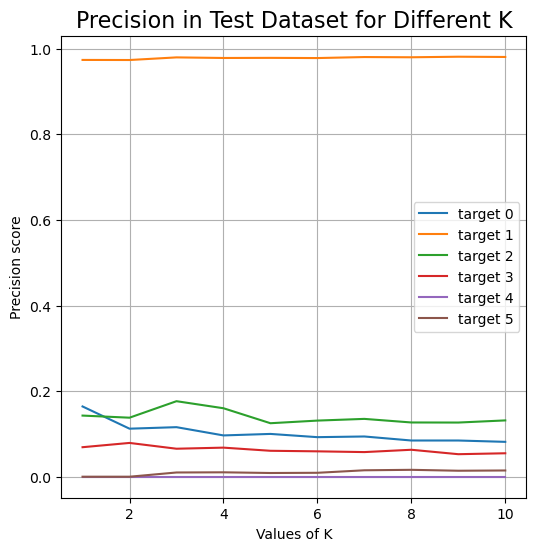

In [49]:
#Plotting  Precision for Each Target for Varing K Values
plt.figure(figsize = (6, 6))
precision = np.array(precision)    

plt.plot(k, precision[:,0], label = 'target 0' )
plt.plot(k, precision[:,1], label = 'target 1' )
plt.plot(k, precision[:,2], label = 'target 2' )
plt.plot(k, precision[:,3], label = 'target 3' )
plt.plot(k, precision[:,4], label = 'target 4' )
plt.plot(k, precision[:,5], label = 'target 5' )
plt.xlabel ('Values of K')
plt.ylabel ('Precision score')
plt.title ('Precision in Test Dataset for Different K', fontsize = 16)
plt.legend()  
plt.grid()

**The precision plot still shows imbalance after resampling with SMOTE-TOMEK, it could be due to:**

* The evaluation metric used may not be appropriate for the problem. Precision is a useful metric but I would also try recall or F1 score, I may get a more comprehensive evaluation of the model's performance.

* The model used to train on the resampled data may not be well-suited for the problem. It is possible that a different model or hyperparameter tuning could yield better results. I would be comparing KNN with Random Forest and Decision Tree Models

* The underlying data distribution may still be imbalanced despite the resampling. In this case, other methods for handling class imbalance may need to be considered.


REFERENCE : 
* Galar, M., Fernandez, A., Barrenechea, E., Bustince, H., & Herrera, F. (2016). A review on ensembles for the class imbalance problem: Bagging-, boosting-, and hybrid-based approaches. IEEE Transactions on Systems, Man, and Cybernetics: Systems, 46(4), 612-627. doi: 10.1109/TSMC.2015.2461271

* He, H., & Garcia, E. A. (2009). Learning from imbalanced data. IEEE Transactions on Knowledge and Data Engineering, 21(9), 1263-1284. doi: 10.1109/TKDE.2008.239

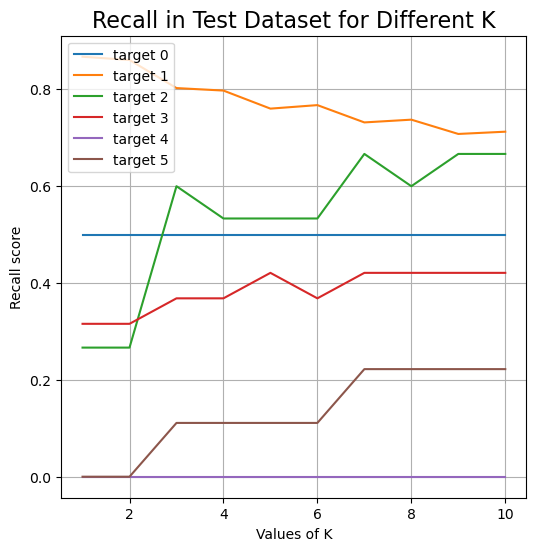

In [50]:
#Plotting Recall for Each Target for Varing K Values
plt.figure(figsize = (6, 6))
recall = np.array(recall)    

plt.plot(k, recall[:,0], label = 'target 0' )
plt.plot(k, recall[:,1], label = 'target 1' )
plt.plot(k, recall[:,2], label = 'target 2' )
plt.plot(k, recall[:,3], label = 'target 3' )
plt.plot(k, recall[:,4], label = 'target 4' )
plt.plot(k, recall[:,5], label = 'target 5' )
plt.xlabel ('Values of K')
plt.ylabel ('Recall score')
plt.title ('Recall in Test Dataset for Different K', fontsize = 16)
plt.legend()  
plt.grid()

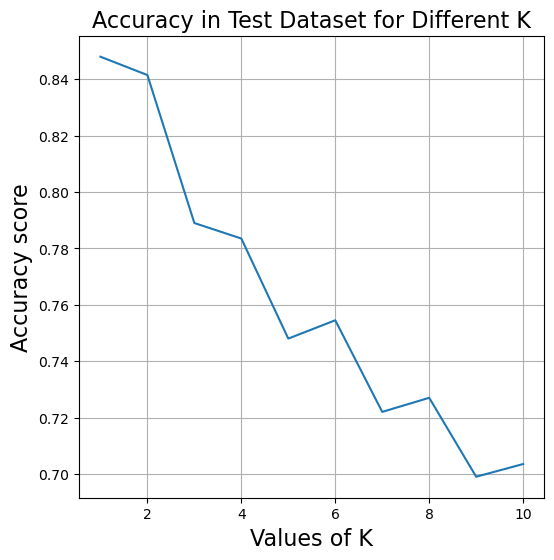

In [51]:
plt.figure(figsize = (6, 6))
plt.plot(k, accuracy)
plt.xlabel ('Values of K', fontsize = 16)
plt.ylabel ('Accuracy score', fontsize = 16)
plt.title ('Accuracy in Test Dataset for Different K', fontsize = 16)

plt.grid()

**Using Optimal K for the Classification**

In [52]:
#Use knn at K=1
knn = KNeighborsClassifier(n_neighbors=1)
    
#Fit the knn based on train data
knn.fit(X_train_resampled, y_train_resampled) 
    
#Predict the target based on test data
y_pred = knn.predict(x_test)

**Plotting Confusion Matrix**

In [53]:
print ('Accuracy Score : ', accuracy_score(y_test, y_pred) )
print ('Report : ')
print (classification_report(y_test, y_pred))

Accuracy Score :  0.848
Report : 
              precision    recall  f1-score   support

           0       0.16      0.50      0.25        22
           1       0.97      0.87      0.92      1931
           2       0.14      0.27      0.19        15
           3       0.07      0.32      0.11        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.85      2000
   macro avg       0.22      0.32      0.24      2000
weighted avg       0.94      0.85      0.89      2000



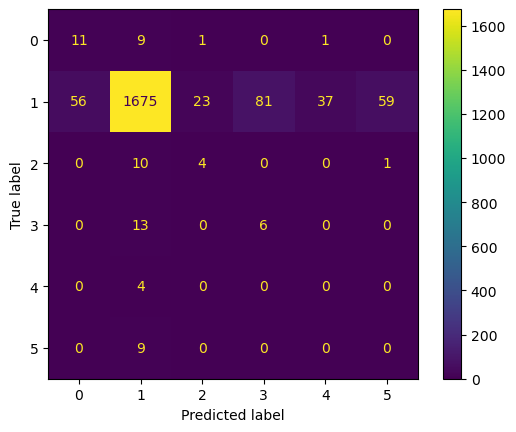

In [54]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

**Using Cross-validation**

In [55]:
KNN = KNeighborsClassifier()

# Define the hyperparameters for tuning
param_grid = [{'n_neighbors': [1, 10]}]

In [56]:
#Fit the knn with the appropriate parameters to the train data
grid_search = GridSearchCV(KNN, param_grid, cv=3, scoring='f1_micro')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [1, 10]}], scoring='f1_micro')

In [57]:
grid_search.best_params_

{'n_neighbors': 1}

In [58]:
grid_search.best_estimator_

KNeighborsClassifier(n_neighbors=1)

In [59]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']].head()


,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,{'n_neighbors': 1},0.971392,0.969316,0.967692,0.969466,0.001514,1
1,{'n_neighbors': 10},0.933052,0.934739,0.930258,0.932683,0.001848,2


**Using the Best Estimator Against the Training Data**

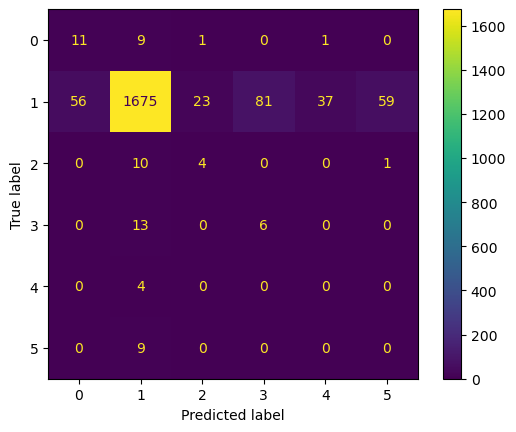

In [60]:
BestKNN = KNeighborsClassifier(n_neighbors = 1)

BestKNN.fit(X_train_resampled, y_train_resampled) 
y_pred = BestKNN.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

**Cross Validation using StratifiedKFold**

In [61]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initializing the StratifiedKFold object with the desired number of splits (n_splits=5). 
# The data is shuffled before splitting into folds.
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Storing the evaluation metrics (F1 score, accuracy, recall, and precision) calculated for each fold during cross-validation.
cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

In [62]:
# Iterating over the train-validation splits generated by kf.split() function. 
# For each split, assigning the training and validation subsets of the input features and target variable
# to the train and validation variables, respectively. 
for train_index_ls, validation_index_ls in kf.split(x_train, y_train):  
    train, validation = x_train.iloc[train_index_ls], x_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    
    # Applying thr SMOTETomek algorithm.  
    smote = SMOTETomek(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(train, target_train)
   
    # Training the model on resampled training set.
    BestKNN.fit(X_train_resampled, y_train_resampled)
    # Makeing predictions on the validation set.
    validation_preds = BestKNN.predict(validation)
    
    # Calculateing and appending the recall, accuracy, precision, and F1 score to the corresponding lists
    cross_val_recall_lst.append(recall_score(target_val, validation_preds, average='macro'))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds, average='macro'))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds, average='macro'))
   

In [63]:
# Printing the mean values of the evaluation metrics across all folds to assess the overall performance 
# of the model during cross-validation.
print ('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print ('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print ('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print ('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

Cross validated accuracy: 0.8316647123202001
Cross validated recall score: 0.38726704752076313
Cross validated precision score: 0.22208481933095542
Cross validated f1_score: 0.24370958041469568


StratifiedKFold is a method used for cross-validation in machine learning. It is specifically designed for scenarios where you have imbalanced or unevenly distributed target classes in your dataset.

### Random Forest Model

In [64]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
r_clf = RandomForestClassifier()
r_clf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [65]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

y_rf_pred=r_clf.predict(x_test)

print ('Accuracy Score : ', accuracy_score(y_test, y_rf_pred) )
print ('Report : ')
print (classification_report(y_test, y_rf_pred))

Accuracy Score :  0.89
Report : 
              precision    recall  f1-score   support

           0       0.22      0.59      0.32        22
           1       0.98      0.91      0.94      1931
           2       0.14      0.27      0.18        15
           3       0.11      0.26      0.15        19
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         9

    accuracy                           0.89      2000
   macro avg       0.24      0.34      0.27      2000
weighted avg       0.95      0.89      0.92      2000



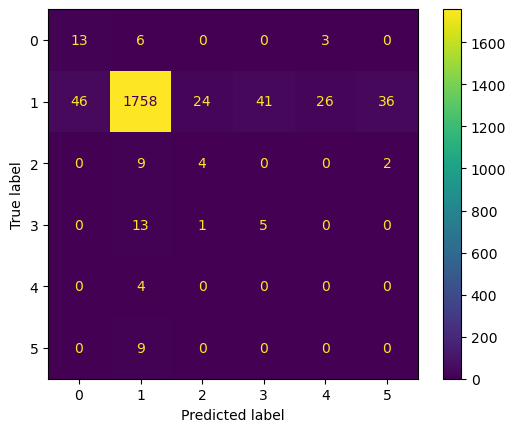

In [66]:
cm = confusion_matrix(y_test, y_rf_pred, labels=r_clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=r_clf.classes_)
disp.plot()

**Using Cross Validation**

In [67]:
from sklearn.model_selection import GridSearchCV

#params = {'n_estimators': [200, 500], 'max_depth': [5, 10]} 
params = {'n_estimators': [200, 500],'max_depth': [5, 10],'min_samples_split': [200, 1000],'max_features':[3,6]}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=3, scoring='f1_micro')
grid_search.fit(X_train_resampled, y_train_resampled)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10], 'max_features': [3, 6],
                         'min_samples_split': [200, 1000],
                         'n_estimators': [200, 500]},
             scoring='f1_micro')

In [68]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 3,
 'min_samples_split': 200,
 'n_estimators': 200}

**Looking at the individual model with the hyperparameter combinations and how they are performing.**

In [69]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results[['params','split0_test_score','split1_test_score','split2_test_score', 'mean_test_score', 'std_test_score', 
        'rank_test_score']].head(20)

,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.758942,0.764539,0.770685,0.764722,0.004796,10
1,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.762024,0.765756,0.770766,0.766182,0.003581,9
2,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.740368,0.741423,0.749189,0.743660,0.003933,11
3,"{'max_depth': 5, 'max_features': 3, 'min_sampl...",0.733555,0.743937,0.750649,0.742714,0.007032,12
4,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.734204,0.738178,0.740023,0.737468,0.002428,13
5,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.734447,0.735988,0.739049,0.736495,0.001913,14
6,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.719280,0.726012,0.727693,0.724328,0.003635,15
7,"{'max_depth': 5, 'max_features': 6, 'min_sampl...",0.719685,0.723903,0.727612,0.723733,0.003238,16
8,"{'max_depth': 10, 'max_features': 3, 'min_samp...",0.879958,0.881580,0.883193,0.881577,0.001321,1
9,"{'max_depth': 10, 'max_features': 3, 'min_samp...",0.879958,0.881499,0.882787,0.881415,0.001157,2


**Using the Best Estimator Against the Training Data**

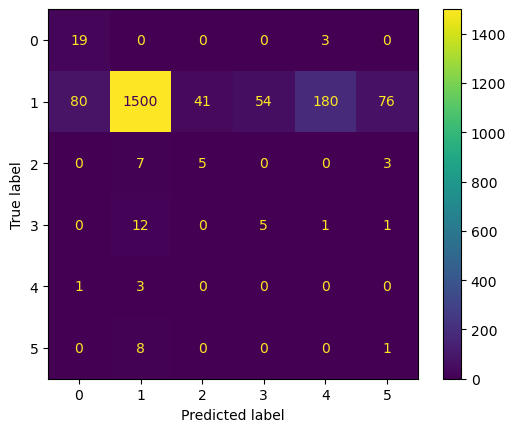

In [70]:
from sklearn.model_selection import cross_val_score
BestRF = RandomForestClassifier(max_depth = 10, n_estimators=500)
#Predict the target based on test data
#Fit the random forest based on train data


BestRF.fit(X_train_resampled, y_train_resampled) 
y_pred = BestRF.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

**Cross Validation using StratifiedKFold**

In [71]:
# Initializing the StratifiedKFold object with the desired number of splits (n_splits=5). 
# The data is shuffled before splitting into folds.
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Storing the evaluation metrics (F1 score, accuracy, recall, and precision) calculated for each fold during cross-validation.
cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

In [72]:
# Iterating over the train-validation splits generated by kf.split() function. 
# For each split, assigning the training and validation subsets of the input features and target variable
# to the train and validation variables, respectively. 
for train_index_ls, validation_index_ls in kf.split(x_train, y_train):  
    train, validation = x_train.iloc[train_index_ls], x_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    
    # Applying thr SMOTETomek algorithm.  
    smote = SMOTETomek(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(train, target_train)
   
    # Training the model on resampled training set.
    BestRF.fit(X_train_resampled, y_train_resampled)
    # Makeing predictions on the validation set.
    validation_preds = BestRF.predict(validation)
    
    # Calculateing and appending the recall, accuracy, precision, and F1 score to the corresponding lists
    cross_val_recall_lst.append(recall_score(target_val, validation_preds, average='macro'))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds, average='macro'))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds, average='macro'))
   

In [73]:
# Printing the mean values of the evaluation metrics across all folds to assess the overall performance 
# of the model during cross-validation.
print ('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print ('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print ('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print ('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

Cross validated accuracy: 0.77388375547217
Cross validated recall score: 0.5218052196304642
Cross validated precision score: 0.24845964216539396
Cross validated f1_score: 0.28005731114258897


## Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train_resampled, y_train_resampled)


DecisionTreeClassifier(random_state=42)

In [75]:
y_dt_pred = tree_clf.predict(x_test)

print ('Accuracy Score : ', accuracy_score(y_test, y_dt_pred) )
print ('Report : ')
print (classification_report(y_test, y_dt_pred))

Accuracy Score :  0.8485
Report : 
              precision    recall  f1-score   support

           0       0.17      0.36      0.23        22
           1       0.98      0.87      0.92      1931
           2       0.08      0.20      0.12        15
           3       0.06      0.26      0.09        19
           4       0.00      0.00      0.00         4
           5       0.02      0.11      0.03         9

    accuracy                           0.85      2000
   macro avg       0.22      0.30      0.23      2000
weighted avg       0.95      0.85      0.89      2000



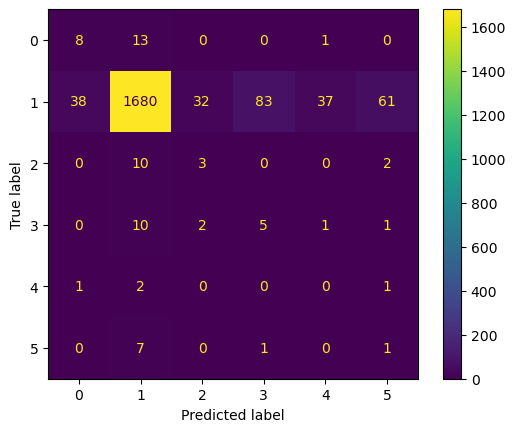

In [76]:
ConfusionMatrixDisplay.from_predictions(y_test, y_dt_pred)

plt.show()

**Using Cross Validation**

In [77]:
from sklearn.model_selection import GridSearchCV

params = {'min_samples_leaf': [5, 10], 'min_samples_split': [5, 10], 'max_depth' : [3, 6]}

grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, scoring ='f1', verbose=4, cv=5)

grid_search_cv.fit(X_train_resampled, y_train_resampled)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=5;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=5;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=5;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=5;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split=5;, score=nan total time=   0.0s
[CV 1/5] END max_depth=3, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 2/5] END max_depth=3, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 3/5] END max_depth=3, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 4/5] END max_depth=3, min_samples_leaf=5, min_samples_split=10;, score=nan total time=   0.0s
[CV 5/5] END max_depth=3, min_samples_leaf=5, min_samples_split

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 6], 'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10]},
             scoring='f1', verbose=4)

In [78]:
pd.DataFrame(grid_search_cv.cv_results_).head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.051867,0.002521,0.006604,0.006752,3,5,5,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,0.050670,0.000748,0.003186,0.000386,3,5,10,"{'max_depth': 3, 'min_samples_leaf': 5, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
2,0.050258,0.000494,0.003199,0.000397,3,10,5,"{'max_depth': 3, 'min_samples_leaf': 10, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,0.053849,0.002869,0.002992,0.000002,3,10,10,"{'max_depth': 3, 'min_samples_leaf': 10, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,0.089559,0.001480,0.003592,0.000489,6,5,5,"{'max_depth': 6, 'min_samples_leaf': 5, 'min_s...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,5


In [79]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5,
                       random_state=42)

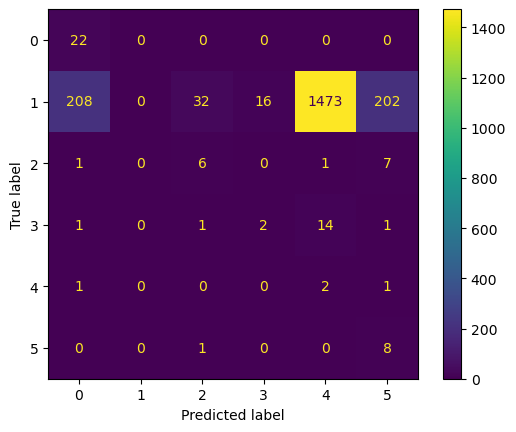

In [80]:
y_dt_pred = grid_search_cv.predict(x_test)

from sklearn.model_selection import cross_val_score
BestDT =DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, min_samples_split=5, random_state=42)
#Predict the target based on test data
#Fit the random forest based on train data
BestDT.fit(X_train_resampled, y_train_resampled) 
y_pred = BestDT.predict(x_test)

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

plt.show()

**Cross Validation using StratifiedKFold**

In [81]:
# Initializing the StratifiedKFold object with the desired number of splits (n_splits=5). 
# The data is shuffled before splitting into folds.
kf = StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

# Storing the evaluation metrics (F1 score, accuracy, recall, and precision) calculated for each fold during cross-validation.
cross_val_f1_score_lst = []
cross_val_accuracy_lst = []
cross_val_recall_lst = []
cross_val_precision_lst = []

In [82]:
# Iterating over the train-validation splits generated by kf.split() function. 
# For each split, assigning the training and validation subsets of the input features and target variable
# to the train and validation variables, respectively. 
for train_index_ls, validation_index_ls in kf.split(x_train, y_train):  
    train, validation = x_train.iloc[train_index_ls], x_train.iloc[validation_index_ls]
    target_train, target_val = y_train.iloc[train_index_ls], y_train.iloc[validation_index_ls]
    
    # Applying thr SMOTETomek algorithm.  
    smote = SMOTETomek(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(train, target_train)
   
    # Training the model on resampled training set.
    BestDT.fit(X_train_resampled, y_train_resampled)
    # Makeing predictions on the validation set.
    validation_preds = BestDT.predict(validation)
    
    # Calculateing and appending the recall, accuracy, precision, and F1 score to the corresponding lists
    cross_val_recall_lst.append(recall_score(target_val, validation_preds, average='macro'))
    cross_val_accuracy_lst.append(accuracy_score(target_val, validation_preds))
    cross_val_precision_lst.append(precision_score(target_val, validation_preds, average='macro'))
    cross_val_f1_score_lst.append(f1_score(target_val, validation_preds, average='macro'))
   

In [83]:
# Printing the mean values of the evaluation metrics across all folds to assess the overall performance 
# of the model during cross-validation.
print ('Cross validated accuracy: {}'.format(np.mean(cross_val_accuracy_lst)))
print ('Cross validated recall score: {}'.format(np.mean(cross_val_recall_lst)))
print ('Cross validated precision score: {}'.format(np.mean(cross_val_precision_lst)))
print ('Cross validated f1_score: {}'.format(np.mean(cross_val_f1_score_lst)))

Cross validated accuracy: 0.020259928080050033
Cross validated recall score: 0.5134783272283272
Cross validated precision score: 0.08002476648796177
Cross validated f1_score: 0.10409617434438216


 **Generally, the models performed poorly due to high imbalance of the dataset.**